# PyAudio
Record from the computer's microphone.

In [17]:
import pyaudio

In [12]:
int(RATE / chunk * RECORD_SECONDS)

215

In [2]:
chunk = 1024
FORMAT = pyaudio.paInt32
CHANNELS = 1
RATE = 44100
RECORD_SECONDS = 5
WAVE_OUTPUT_FILENAME = "new.wav"
p = pyaudio.PyAudio()
stream = p.open(format = FORMAT,
    channels = CHANNELS,
    rate = RATE,
    input = True,
    frames_per_buffer = chunk)
all = []
for i in range(0, int(RATE / chunk * RECORD_SECONDS)):
    data = stream.read(chunk)
    all.append(data)
print("* done recording")
stream.close()
p.terminate()

* done recording


Write out the data to a file.

In [14]:
len(data)

4096

In [4]:
!ls -lat |more

total 17488
drwxr-xr-x+ 33 jbloom  staff     1122 Sep 16 15:18 .
-rw-r--r--+  1 jbloom  staff   880684 Sep 16 15:18 new.wav
-rw-r--r--+  1 jbloom  staff     7280 Sep 16 15:16 4_audio.ipynb
-rw-r--r--+  1 jbloom  staff   880684 Sep 16 15:14 output-sing1.wav
-rw-r--r--+  1 jbloom  staff   139182 Sep 16 15:12 1_talking_to_computers.ipynb
-rw-r--r--+  1 jbloom  staff     7558 Sep 16 15:10 call-example.ipynb
-rw-r--r--+  1 jbloom  staff     3482 Sep 16 14:51 3_clients.ipynb
-rw-r--r--+  1 jbloom  staff    10769 Sep 16 14:50 2_servers.ipynb
-rw-r--r--+  1 jbloom  staff     2603 Sep 16 14:06 breakout.ipynb
-rw-r--r--@  1 jbloom  staff  4098323 Sep 16 13:41 zika.pdf
drwxr-xr-x+ 11 jbloom  staff      374 Sep 16 11:07 .ipynb_checkpoints
-rw-r--r--+  1 jbloom  staff     1312 Sep 15 21:53 Untitled0.ipynb
-rw-r--r--+  1 jbloom  staff    68248 Sep 15 21:48 Audio_Analysis.png
-rw-r--r--+  1 jbloom  staff   880684 Sep 15 21:48 output-sing.wav
-rwxr-xr-x+  1 jbloom  staff     3075 Sep 15 21:24 audio_de

In [3]:
import wave
data = b"".join(all)
wf = wave.open(WAVE_OUTPUT_FILENAME, "wb")
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(data)
wf.close()

In [5]:
!open new.wav

Plot the amplitude as a function of time.

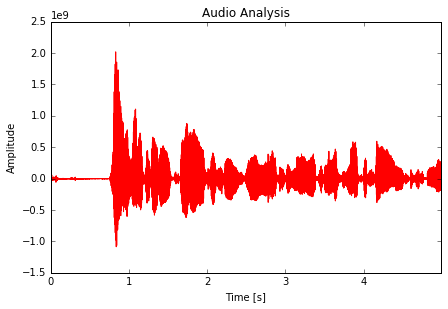

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import *

integer_data = fromstring(data, dtype=np.int32)
time = arange(size(integer_data)) / float(RATE)
plot_title = ("Audio Analysis")

fig = plt.figure(figsize=(7, 4.5))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(time, integer_data, color="red", linestyle="-")
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Amplitude")
ax1.set_xlim(min(time), max(time))
ax1.set_title(plot_title)

Now, let's do it again and analyze the frequency spectrum. Explicit code is unavailable because it is part of your homework.

In [13]:
!ls -lat |more

total 18368
-rw-r--r--+  1 jbloom  staff    87972 Sep 16 15:22 Audio_Analysis.png
-rw-r--r--+  1 jbloom  staff   880684 Sep 16 15:22 output-sing.wav
drwxr-xr-x+ 33 jbloom  staff     1122 Sep 16 15:22 .
-rw-r--r--+  1 jbloom  staff   438216 Sep 16 15:22 4_audio.ipynb
-rw-r--r--+  1 jbloom  staff   880684 Sep 16 15:18 new.wav
-rw-r--r--+  1 jbloom  staff   880684 Sep 16 15:14 output-sing1.wav
-rw-r--r--+  1 jbloom  staff   139182 Sep 16 15:12 1_talking_to_computers.ipynb
-rw-r--r--+  1 jbloom  staff     7558 Sep 16 15:10 call-example.ipynb
-rw-r--r--+  1 jbloom  staff     3482 Sep 16 14:51 3_clients.ipynb
-rw-r--r--+  1 jbloom  staff    10769 Sep 16 14:50 2_servers.ipynb
-rw-r--r--+  1 jbloom  staff     2603 Sep 16 14:06 breakout.ipynb
-rw-r--r--@  1 jbloom  staff  4098323 Sep 16 13:41 zika.pdf
drwxr-xr-x+ 11 jbloom  staff      374 Sep 16 11:07 .ipynb_checkpoints
-rw-r--r--+  1 jbloom  staff     1312 Sep 15 21:53 Untitled0.ipynb
-rwxr-xr-x+  1 jbloom  staff     3075 Sep 15 21:24 audio_de

* recording
* done recording


/Users/jbloom/Classes/python-seminar/DataFiles_and_Notebooks/04_Interacting_with_the_World/audio_demo.py:75: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  p = p[0:nUniquePts]


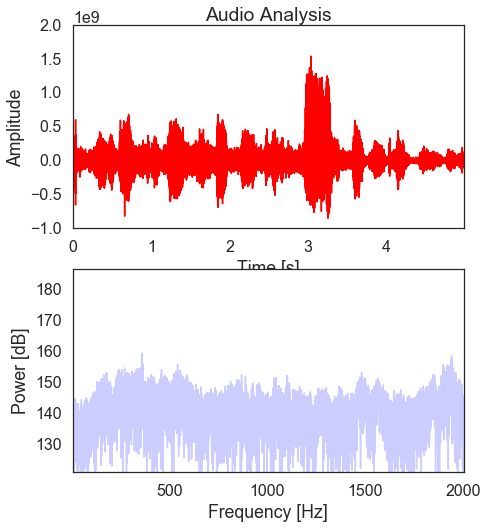

In [21]:
run audio_demo.py

In [22]:
import scipy.io.wavfile
rate, dat = scipy.io.wavfile.read("output-sing.wav", mmap=False)

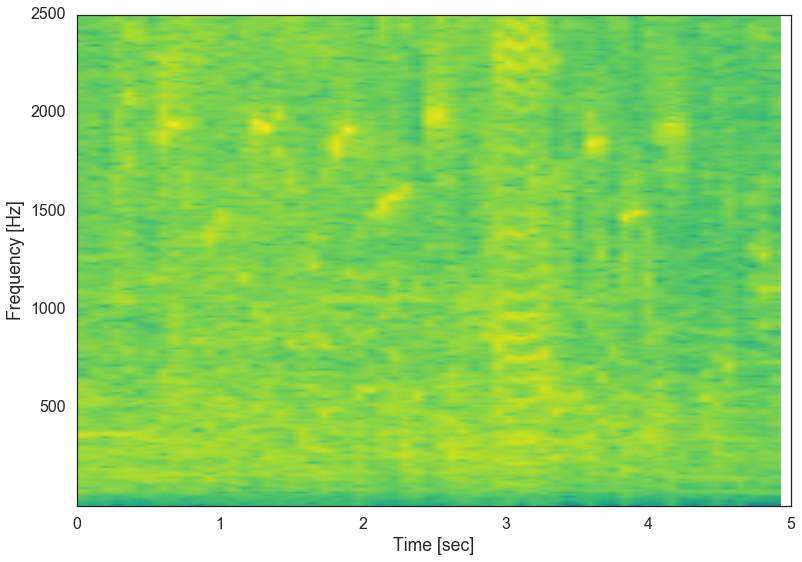

In [23]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="poster")

Pxx, freqs, bins, im = plt.specgram(dat, NFFT=2048*2, Fs=rate, noverlap=512,
                                cmap=plt.cm.viridis)
plt.ylim(1,2500)
plt.xlabel("Time [sec]")
plt.ylabel("Frequency [Hz]")